# Sarrus Kinematics
Thanks to James Arnold for sharing his solutions; I have modified and updated them to fit the desired solution / approach

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy
import scipy.optimize
import numpy as np

### 1. Make a table of link lengths corresponding to the vectors defined by the six heavy black lines. Please approximate the lengths of each link of the mechanism, as well as the device’s initial position. No need to match exactly with the original drawing.

#### <center> Table I. Approximate Link Lengths (arbitrary units) </center>
| Link | Length |
| --- | --- |
| Link P0-P1 | 3.36 |
| Link P1-P2 | 3.59 |
| Link P2-P3 | 2.52 |
| Link P3-P4 | 3.00 |
| Link P4-P5 | 3.36 |
| Link P5-P0 | 2.70 |

#### <center> Table II. Joint Locations (arbitrary units) </center>
| Point | X | Y |
| --- | --- |  --- |
| P0 | 0 | 0 |
| P1 | 3.36 | 0 |
| P2 | 4.16 | 3.51 |
| P3 | 3.18 | 5.82 |
| P4 | 0.18 | 5.82 |
| P5 | -0.79 | 2.60 |

### 2. Plot the mechanism in Python using the matplotlib.pyplot package, making sure to label each vertex over each line.

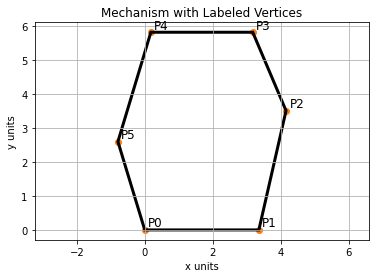

In [2]:
x_ini = [0, 3.36, 4.16, 3.18, 0.18, -0.79]
y_ini = [0, 0, 3.51, 5.82, 5.82, 2.60]

plt.figure()
plt.axis('equal')
plt.fill(x_ini, y_ini, facecolor='none', edgecolor='black', linewidth=3)
plt.scatter(x_ini, y_ini)

labels = ["P0", "P1", "P2", "P3", "P4", "P5"]

for i, labels in enumerate(labels):
    plt.annotate(labels, (x_ini[i]+0.1, y_ini[i]+0.1), fontsize="12")

# Make the plot more readable
plt.grid()
plt.title("Mechanism with Labeled Vertices")
plt.xlabel("x units")
plt.ylabel("y units")
plt.show()

### 3. Create an objective function whose error is zero when:
#### a. All of the length constraints of the mechanism are correctly estimated
#### b. The base of the robot is fixed to the ground and in a specified orientation
#### c. The end-effector(defined by the link between P3 and P4) is parallel to the input link.
#### d. The x-component of the distance between P0 and P4 is zero.
#### e. The internal degree of freedom defined by q matches a value given or set by you.

In [3]:
# Define a function to calculate the distance between two coordinates
def calc_dist(tuple1, tuple2):
    array1 = []
    array2 = []
    
    for i in tuple1:
        array1.append(i)
        
    for i in tuple2:
        array2.append(i)
    
    array1 = np.array(array1)
    array2 = np.array(array2)
    
    vector = array2-array1
    
    dist = (vector.dot(vector))**.5
    return dist
    


In [4]:

# Desired link lengths
len01_des = 3.36
len12_des = 3.59
len23_des = 2.52
len34_des = 3.00
len45_des = 3.36
len50_des = 2.70

# Desired location of p0
p0_des = 0,0

q_des = 3
    
    
def objective_function(variables):

    # Get all the variables out
    x0,y0,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5 = variables
    
    p0 = x0,y0
    p1 = x1,y1
    p2 = x2,y2
    p3 = x3,y3
    p4 = x4,y4
    p5 = x5,y5
    
    # Calculate the actual link lengths
    link01 = calc_dist(p0,p1)
    link12 = calc_dist(p1,p2)
    link23 = calc_dist(p2,p3)
    link34 = calc_dist(p3,p4)
    link45 = calc_dist(p4,p5)
    link50 = calc_dist(p5,p0)
    
    # Calculate distance defining q
    q_dist = calc_dist(p5,p2)
    
    # x component of the distance between p0 and p4 is zero.
    vertAlign = p0[0]-p4[0]
    
    # Parallel end effector (want y components of p4 and p3 to be equal)
    # Note that the base is already fixes, so this will be parallel
    parallel = p3[1]-p4[1]
    
    # Define the error being minimized
    error = []
    # Append all errors -- should be 12
    error.append(link01-len01_des)
    error.append(link12-len12_des)
    error.append(link23-len23_des)
    error.append(link34-len34_des)
    error.append(link45-len45_des)
    error.append(link50-len50_des)
    # p0 is fixed at the origin
    error.append(x0-0)
    error.append(y0-0)
    #p1 is horizontal with p0
    error.append(y1-0)
    #specify input length
    error.append(q_dist-q_des)
    #extra two sarrus constraints usually taken care of by 3d mechanisms
    error.append(vertAlign)
    error.append(parallel)
    
    error = np.array(error)
    error = (error.dot(error))**.5
    
    return error  

### 4. Solve this function three times using the `scipy.optimize.minimize` function: once for each of three states where the input  is varied by a small, constant amount. Select an initial guess for the state of the system that is close to the right answer but not exact; update the initial guess with the results of the prior solution after that.
#### a. Show the result of each evaluation. This should demonstrate that the error in the result after each calculation is small (less than ~1e-3).
#### b. Plot the device in each of its three configurations (within a single figure)

In [5]:
#specify input
dq = 1
all_q_des = [4,4+dq,4+2*dq]

Current input q: 4
0 iteration error: 1.261580085121429e-07
1 iteration error: 1.2387358732047626e-07
2 iteration error: 1.2387358732047626e-07
Current input q: 5
0 iteration error: 1.184267370237846e-07
1 iteration error: 1.0918563268433126e-07
2 iteration error: 1.091731057938267e-07
Current input q: 6
0 iteration error: 1.1818253137711639e-07
1 iteration error: 1.0830500890856397e-07
2 iteration error: 1.0830500890856397e-07


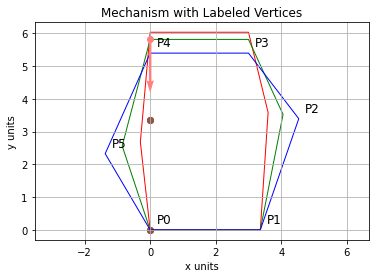

In [6]:
plt.figure()

posEnd = []

edgecolors = ["red", "green", "blue"]

#specify the index representing the end-effector
output_index = 4

output = []

for j in range(3):
    q_des =  all_q_des[j]
    
    print("Current input q:", q_des)
    
    ini = x_ini + y_ini
    ini[::2] = x_ini
    ini[1::2] = y_ini

    # Do 3 iterations of the optimization
    for k in range(3):
        result = scipy.optimize.minimize(objective_function,ini)
        error = objective_function(result.x)
        print(k, "iteration error:", error)
        ini = result.x

    found = result.x.copy()
    found=found.reshape((6,2))
    output.append(found)
    
    #posEnd.append(found[output_index,1])

    plt.axis('equal')
    plt.fill(found[:,0], found[:,1], facecolor='none', edgecolor=edgecolors[j], linewidth=1)
    plt.scatter(found[0], found[1])

# Make the plot more readable

labels = ["P0", "P1", "P2", "P3", "P4", "P5"]

output = numpy.array(output)

for i, labels in enumerate(labels):
    plt.annotate(labels, (found[i,0]+0.2, found[i,1]+0.2), fontsize="12")
        
plt.grid()
plt.title("Mechanism with Labeled Vertices")
plt.xlabel("x units")
plt.ylabel("y units")

#find the difference between the two nearest neighbors
dxdy_2 = output[2,output_index,:]-output[0,output_index,:]

#plot the slope on the middle position
plt.plot(*output[1,output_index,:],"o",color=(1,.5,.5,1),zorder=10)
plt.quiver(*output[1,output_index,:],*dxdy_2, scale=4,color=(1,.5,.5,1),zorder=10)
plt.show()


### 5. Now approximate the rate of change of the middle point of the trajectory by finding the slope between the first and third point. Define a point on the mechanism that serves as the “output” or “end-effector.”2
#### a. Calculate the slope in python and print the result.
#### b. Plot the 3-point trajectory.
#### c. Overplot the slope on the middle point using an arrow.

In [7]:
slope = dxdy_2[1]/dxdy_2[0]
slope

-177742674.51558852

The slope is _nearly_ infinite(vertical) because the y-component is nonzero while the x-component of the slope is essentially zero (down to machine precision).  This corresponds to the mechanism moving only up or down

### 6. Compute the Jacobian Matrix in that middle state. This should be a 2x1 matrix, as it is a 2D mechanism.

With the input q considered as the x component of a frame whose x-axis is aligned with the vector from P5 to P2, the input matrix can be written as:

$$
\mathbf{q}
= 
\begin {bmatrix} 
q \\ 0 \end{bmatrix}$$

Therefore, the derivative of this matrix will be:
$$
\mathbf{\dot{q}}
= 
\begin {bmatrix} 
\dot{q} \\ 0 \end{bmatrix}$$

The output of the mechanism is the vertical motion of the end-effector at point P4:
$$
{\vec{r}} = \mathbf{r}
= \mathbf{{p_4}-{p_0}} =
\begin {bmatrix} 
x_4-x_0\\ y_4-y_0 \end{bmatrix}$$

Its derivative will be:
$$
{\dot{\vec{r}}}
= 
\begin {bmatrix} 
\dot{x}\\ \dot{y} \end{bmatrix}$$

The equation for the Jacobian is:
$$
\dot{\vec{r}}=\mathbf{\dot{r}}
=
\mathbf{J} 
\mathbf{\dot{q}}
$$

The Jacobian related the input motion to the output, so it is analogous to the slope found in the previous example. Since the y component of the input vector will always bezero, the partial derivative for this component in the Jacobian will also be zero. 

Remember in our case, we computed dy & dx in terms of the two nearest neighbors, getting $2 \begin{bmatrix}\Delta y\\\Delta x\end{bmatrix}$, so to get J we need to divide by $2\Delta y$

So the Jacobian (at middle point in the trajectory) is as follows:



In [8]:
J = numpy.array([dxdy_2]).T/(2*dq)
J

array([[ 1.79149529e-09],
       [-3.18425165e-01]])

### 7. Now, assume that a force $\vec{f}$ of $f=\left[\begin{matrix}10\\-10\end{matrix}\right]$ (2D) is applied to the end-effector. Compute the force experienced at the input.

The equation for mapping between the input and output forces can be written as:

$$
\mathbf{F_{in}}
=
\mathbf{J^{T}} 
\mathbf{F_{out}}
$$

Therefore, for the given force at the end-effector and substituting the previously found Jacobian:
$$
\mathbf{F_{in}}
=
\mathbf{J}
\begin {bmatrix} 
10 \\ -10 \end{bmatrix}$$

So, the force at the input (at q) is found to be:

In [9]:
f=numpy.array([[10,-10]]).T
t = J.T.dot(f)
t

array([[3.18425166]])

### 8. What happens when the force $\vec{f}$ applied to the end-effector changes to $f=\left[\begin{matrix}0\\-10\end{matrix}\right]$ (2D). Provide a rationale as to how or why this answer contrasts with the previous one.

Following the same procedure as in #7:
$$
\mathbf{F_{in}}
=
\mathbf{J}^T\begin {bmatrix} 
0 \\ -10 \end{bmatrix}
$$

In [10]:
f=numpy.array([[0,-10]]).T
t = J.T.dot(numpy.array([[0,-10]]).T)
t

array([[3.18425165]])

This answer doesn't change because components of the force pushing in the x-direction are transmitted completely through the mechanism's structural elements to ground, rather than transmitted to the actuator.  The clue is that the Jacobian's x-component is essentially zero.  Therefore, it shouldn't matter to a perfectly rigid mechanism how hard you push in the x-axis, only the y-axis is driven by the actuator.

### 9. Now, assume that the input is moving at a rate of 2.4 . How fast is the output moving?

The Jacobian can be used to map from input to output speed as shown in the equation below:
$$
\mathbf{\dot{y}}
=
J
{\dot{q}}$$



In [11]:
y_dot = J.dot(numpy.array([[2.4]]))
y_dot

array([[ 4.29958870e-09],
       [-7.64220395e-01]])